In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

Reading data from the output file.

In [5]:
filename = "PE_nc10_cl1000_change_volume_longer.txt"
ini_time = 12500000
numpy_ini = np.zeros(1718)
names = ['strain', 'stress', 'lz']
ss_full = pd.read_csv(filename)
ss_load= ss_full.loc[:]
strain = ss_load['strain'] + numpy_ini 
stress = ss_load['stress'] + numpy_ini 
time = np.arange(1,1719)

Plotting the strain curve in terms of time.

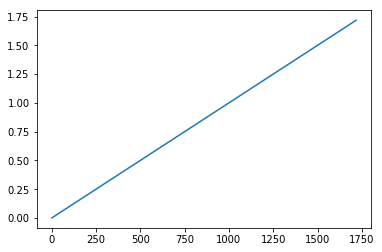

In [6]:
plt.plot(time, strain)

Plotting stress curve in terms of time.

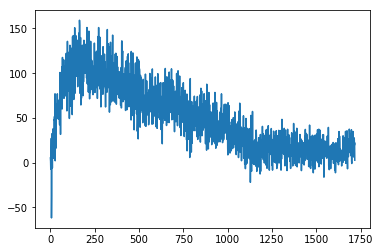

In [7]:
plt.plot(ss_load['stress'])

Plotting stress-strain curve of the deformation.

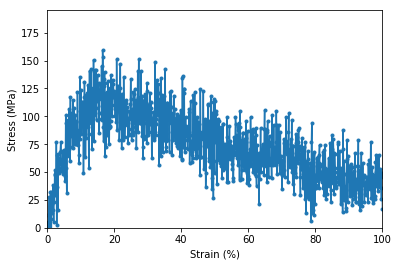

In [25]:
plt.plot(strain * 100,stress,'.-')
plt.xlim([0.0,100])
plt.ylim([0.0,195])
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.savefig("stress-strain.pdf", dpi=2200)

Calculating the Young's Modulus by linearly fitting the linear regime of the stress strain curve.

In [8]:
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, strain[0:50],stress[0:50])
YM = popt[0]
print(YM)

1520.1129993386792


Plotting the linear fitting line on over the original stress-strain curve.

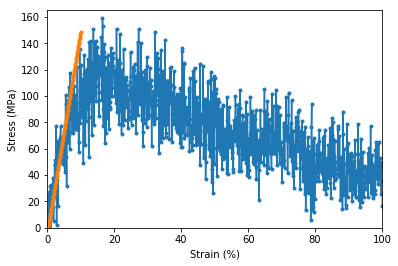

In [22]:
plt.plot(strain * 100,stress,'.-')
plt.plot(strain[0:100] * 100,func(strain[0:100],*popt),'.-')
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.xlim([0.0,100])
plt.ylim([0.0,165])
plt.savefig("stress-strain_fitting.pdf", dpi=2200)